<a href="https://colab.research.google.com/github/lyadav44/data690_fall22/blob/main/Assignment_5/Lecture_6_DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Missing Data

In [106]:
import numpy as np
import pandas as pd

In [107]:
falsy_values = (0, False, None, '', [], {})

In [108]:
any(falsy_values)

False

In [109]:
np.nan

nan

In [110]:
3 + np.nan

nan

In [111]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])

In [112]:
a.sum()

nan

In [113]:
a.mean()

nan

For a numeric array, the `None` value is replaced by `np.nan`:

In [114]:
a = np.array([1, 2, 3, np.nan, None, 4], dtype='float')

In [115]:
a

array([ 1.,  2.,  3., nan, nan,  4.])

In [116]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])

In [117]:
a.mean()

nan

In [118]:
a.sum()

nan

In [119]:
np.inf / 3

inf

In [120]:
np.inf / np.inf

nan

In [121]:
b = np.array([1, 2, 3, np.inf, np.nan, 4], dtype=np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [122]:
b.sum()

nan

### Checking for `nan` or `inf`


In [123]:
np.isnan(np.nan)

True

In [124]:
np.isinf(np.inf)

True

And the joint operation can be performed with `np.isfinite`.

In [125]:
np.isfinite(np.nan), np.isfinite(np.inf)

(False, False)

`np.isnan` and `np.isinf` also take arrays as inputs, and return boolean arrays as results:

In [126]:
np.isnan(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([False, False, False,  True, False, False])

In [127]:
np.isinf(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([False, False, False, False,  True, False])

In [128]:
np.isfinite(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([ True,  True,  True, False, False,  True])

_Note: It's not so common to find infinite values. From now on, we'll keep working with only `np.nan`_

### Filtering them out


In [129]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])

In [130]:
a[~np.isnan(a)]

array([1., 2., 3., 4.])

In [131]:
a[np.isfinite(a)]

array([1., 2., 3., 4.])

In [132]:
a[np.isfinite(a)].sum()

10.0

In [133]:
a[np.isfinite(a)].mean()

2.5

# Pandas utility functions

In [134]:
pd.isnull(np.nan)

True

In [135]:
pd.isnull(None)

True

In [136]:
pd.isna(np.nan)

True

In [137]:
pd.notnull(None)

False

In [138]:
pd.notnull(np.nan)

False

In [139]:
pd.notna(np.nan)

False

In [140]:
pd.notnull(3)

True

In [141]:
pd.isnull(pd.Series([1, np.nan, 7]))

0    False
1     True
2    False
dtype: bool

In [142]:
(pd.Series([1, np.nan, 7]))

0    1.0
1    NaN
2    7.0
dtype: float64

In [143]:
pd.isnull(pd.DataFrame({
    'Column A': [1, np.nan, 7],
    'Column B': [np.nan, 2, 3],
    'Column C': [np.nan, 2, np.nan]
}))

,Column A,Column B,Column C
0,False,True,True
1,True,False,False
2,False,False,True


Pandas Operations with Missing Values

In [144]:
pd.Series([1, 2, np.nan]).count()

2

In [145]:
pd.Series([1, 2, np.nan]).sum()

3.0

In [146]:
pd.Series([2, 2, np.nan]).mean()

2.0

# Filtering missing data

In [147]:
s = pd.Series([1, 2, 3, np.nan, np.nan, 4])

In [148]:
pd.notnull(s)

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [149]:
pd.isnull(s)

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [150]:
pd.notnull(s).sum()

4

In [151]:
pd.isnull(s).sum()

2

In [152]:
s[pd.notnull(s)]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

In [153]:
s.isnull()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [154]:
s.notnull()

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [155]:
s[s.notnull()]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

### Dropping null values

In [156]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [157]:
s.dropna()

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

### Dropping null values on DataFrames

In [158]:
df = pd.DataFrame({
    'Column A': [1, np.nan, 30, np.nan],
    'Column B': [2, 8, 31, np.nan],
    'Column C': [np.nan, 9, 32, 100],
    'Column D': [5, 8, 34, 110],
})

In [159]:
df.head

<bound method NDFrame.head of    Column A  Column B  Column C  Column D
0       1.0       2.0       NaN         5
1       NaN       8.0       9.0         8
2      30.0      31.0      32.0        34
3       NaN       NaN     100.0       110>

In [160]:
df.shape

(4, 4)

In [161]:
df.isnull().sum()

Column A    2
Column B    1
Column C    1
Column D    0
dtype: int64

In [162]:
df.dropna()

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


In [163]:
df.dropna(axis=1) 

,Column D
0,5
1,8
2,34
3,110


In [164]:
df2 = pd.DataFrame({
    'Column A': [1, np.nan, 30],
    'Column B': [2, np.nan, 31],
    'Column C': [np.nan, np.nan, 100]
})

In [165]:
df.dropna(how='all')

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [166]:
df.dropna(how='any') 

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


In [167]:
df.dropna(thresh=3)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34


In [168]:
df.dropna(thresh=3, axis='columns')

,Column B,Column C,Column D
0,2.0,NaN,5
1,8.0,9.0,8
2,31.0,32.0,34
3,NaN,100.0,110


### Filling null values

In [169]:
#Filling nulls with a arbitrary value
s.fillna(0)

0    1.0
1    2.0
2    3.0
3    0.0
4    0.0
5    4.0
dtype: float64

In [170]:
s.fillna(method='ffill')

0    1.0
1    2.0
2    3.0
3    3.0
4    3.0
5    4.0
dtype: float64

In [171]:
s.fillna(method='bfill')

0    1.0
1    2.0
2    3.0
3    4.0
4    4.0
5    4.0
dtype: float64

In [172]:
pd.Series([np.nan, 3, np.nan, 9]).fillna(method='ffill')

0    NaN
1    3.0
2    3.0
3    9.0
dtype: float64

In [173]:
pd.Series([1, np.nan, 3, np.nan, np.nan]).fillna(method='bfill')

0    1.0
1    3.0
2    3.0
3    NaN
4    NaN
dtype: float64

### Cleaning not-null values

In [175]:
df3 = pd.DataFrame({
    'Sex': ['M', 'F', 'F', 'D', '?'],
    'Age': [29, 30, 24, 290, 25],
})
df3

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,?,25


In [176]:
df3['Sex'].unique()

array(['M', 'F', 'D', '?'], dtype=object)

In [177]:
df3['Sex'].value_counts()

F    2
M    1
D    1
?    1
Name: Sex, dtype: int64

In [179]:
df3['Sex'].replace('D', 'F')

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

In [180]:
df3['Sex'].replace({'D': 'F', 'N': 'M'})

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

In [181]:
df3.replace({
    'Sex': {
        'D': 'F',
        'N': 'M'
    },
    'Age': {
        290: 29
    }
})

,Sex,Age
0,M,29
1,F,30
2,F,24
3,F,29
4,?,25


In [183]:
df3.loc[df3['Age'] > 100, 'Age'] = df3.loc[df3['Age'] > 100, 'Age'] / 10
df3

,Sex,Age
0,M,29.0
1,F,30.0
2,F,24.0
3,D,29.0
4,?,25.0


### Duplicates

In [184]:
ambassadors = pd.Series([
    'France',
    'United Kingdom',
    'United Kingdom',
    'Italy',
    'Germany',
    'Germany',
    'Germany',
], index=[
    'Gérard Araud',
    'Kim Darroch',
    'Peter Westmacott',
    'Armando Varricchio',
    'Peter Wittig',
    'Peter Ammon',
    'Klaus Scharioth '
])

In [185]:
ambassadors

Gérard Araud                  France
Kim Darroch           United Kingdom
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
Peter Ammon                  Germany
Klaus Scharioth              Germany
dtype: object

In [186]:
ambassadors.duplicated()

Gérard Araud          False
Kim Darroch           False
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig          False
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In [187]:
ambassadors.duplicated(keep='last')

Gérard Araud          False
Kim Darroch            True
Peter Westmacott      False
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth       False
dtype: bool

In [188]:
ambassadors.duplicated(keep=False)

Gérard Araud          False
Kim Darroch            True
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In [189]:
ambassadors.drop_duplicates()

Gérard Araud                  France
Kim Darroch           United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
dtype: object

In [190]:
ambassadors.drop_duplicates(keep='last')

Gérard Araud                  France
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Klaus Scharioth              Germany
dtype: object

In [191]:
ambassadors.drop_duplicates(keep=False)

Gérard Araud          France
Armando Varricchio     Italy
dtype: object

### Duplicates in DataFrames

In [192]:
players = pd.DataFrame({
    'Name': [
        'Kobe Bryant',
        'LeBron James',
        'Kobe Bryant',
        'Carmelo Anthony',
        'Kobe Bryant',
    ],
    'Pos': [
        'SG',
        'SF',
        'SG',
        'SF',
        'SF'
    ]
})

In [193]:
players

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
2,Kobe Bryant,SG
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [194]:
players.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [195]:
players.drop_duplicates(subset=['Name'], keep='last')

,Name,Pos
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


### Text Handling

In [201]:
df4 = pd.DataFrame({
    'Data': [
        '1987_M_US _1',
        '1990?_M_UK_1',
        '1992_F_US_2',
        '1970?_M_   IT_1',
        '1985_F_I  T_2'
]})

In [202]:
df4

,Data
0,1987_M_US _1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970?_M_ IT_1
4,1985_F_I T_2


In [203]:
df4['Data'].str.split('_', expand=True)

,0,1,2,3
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [204]:
df4['Data'].str.split('_', expand=True)

,0,1,2,3
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [208]:
df4 = df4['Data'].str.split('_', expand=True)

In [209]:
df4.columns = ['Year', 'Sex', 'Country', 'No Children']

In [210]:
df4['Year'].str.contains('\?')

0    False
1     True
2    False
3     True
4    False
Name: Year, dtype: bool

In [211]:
df4['Country'].str.contains('U')

0     True
1     True
2     True
3    False
4    False
Name: Country, dtype: bool

In [212]:
df4['Year'].str.replace(r'(?P<year>\d{4})\?', lambda m: m.group('year'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0    1987
1    1990
2    1992
3    1970
4    1985
Name: Year, dtype: object

### More Visualizations

**Global API**

Matplotlib's default pyplot API has a global, MATLAB-style interface

In [215]:
import matplotlib.pyplot as plt

%matplotlib inline

In [213]:
x = np.arange(-10, 11)

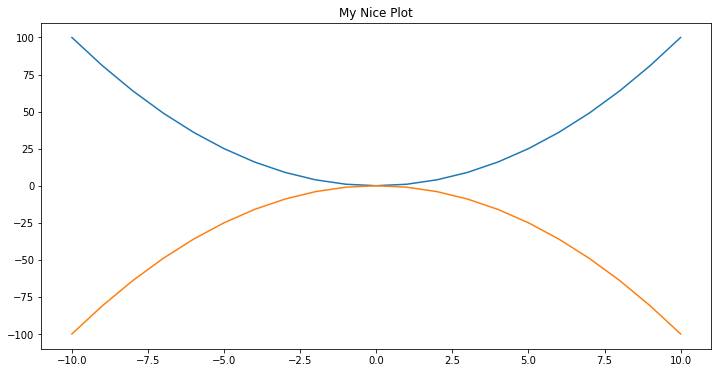

In [216]:
plt.figure(figsize=(12, 6))

plt.title('My Nice Plot')

plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

Text(0, 0.5, 'X Squared')

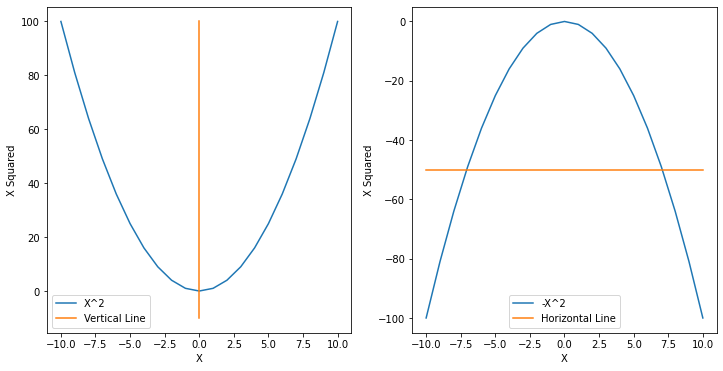

In [217]:
plt.figure(figsize=(12, 6))
plt.title('My Nice Plot')

plt.subplot(1, 2, 1)  # rows, columns, panel selected
plt.plot(x, x ** 2)
plt.plot([0, 0, 0], [-10, 0, 100])
plt.legend(['X^2', 'Vertical Line'])
plt.xlabel('X')
plt.ylabel('X Squared')

plt.subplot(1, 2, 2)
plt.plot(x, -1 * (x ** 2))
plt.plot([-10, 0, 10], [-50, -50, -50])
plt.legend(['-X^2', 'Horizontal Line'])

plt.xlabel('X')
plt.ylabel('X Squared')

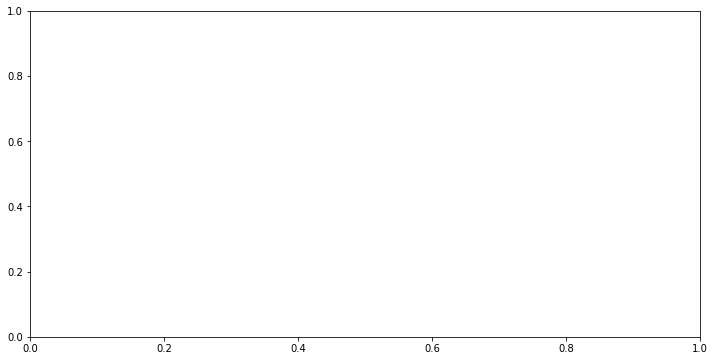

In [218]:
fig, axes = plt.subplots(figsize=(12, 6))

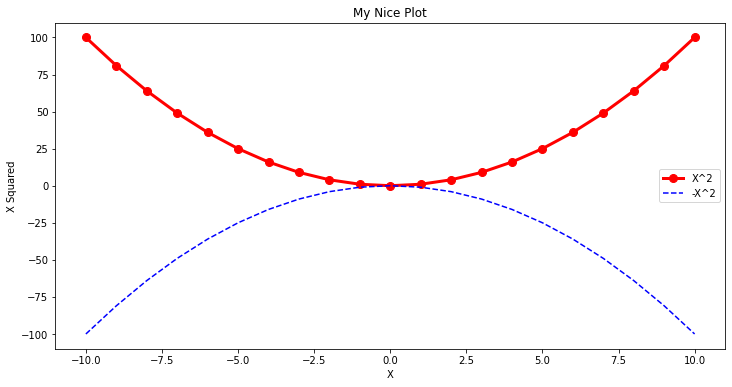

In [219]:
axes.plot(
    x, (x ** 2), color='red', linewidth=3,
    marker='o', markersize=8, label='X^2')

axes.plot(x, -1 * (x ** 2), 'b--', label='-X^2')

axes.set_xlabel('X')
axes.set_ylabel('X Squared')

axes.set_title("My Nice Plot")

axes.legend()

fig

Text(0.5, 1.0, 'My Nice Plot')

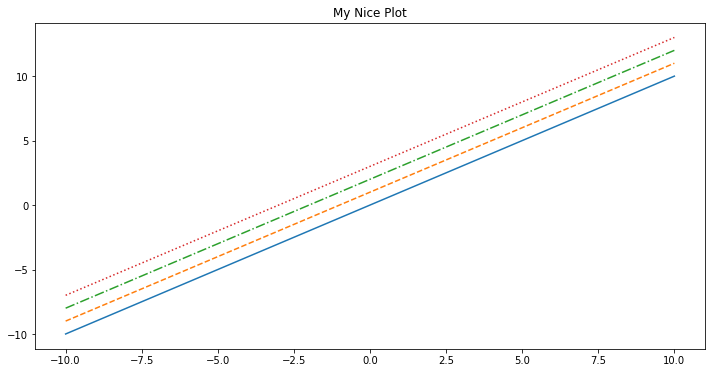

In [220]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, linestyle='solid')
axes.plot(x, x + 1, linestyle='dashed')
axes.plot(x, x + 2, linestyle='dashdot')
axes.plot(x, x + 3, linestyle='dotted');

axes.set_title("My Nice Plot")

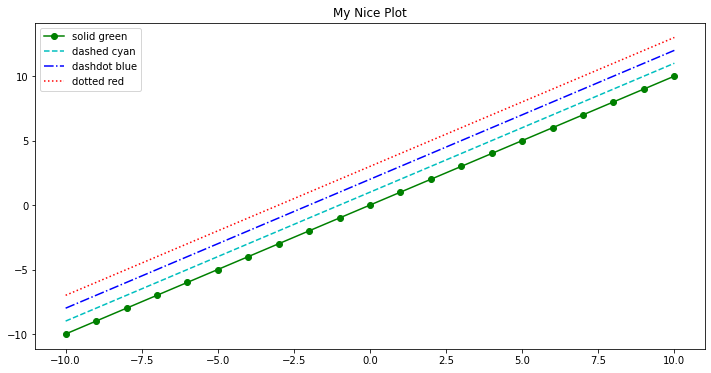

In [221]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, '-og', label="solid green")
axes.plot(x, x + 1, '--c', label="dashed cyan")
axes.plot(x, x + 2, '-.b', label="dashdot blue")
axes.plot(x, x + 3, ':r', label="dotted red")

axes.set_title("My Nice Plot")

axes.legend()

In [222]:
print('Markers: {}'.format([m for m in plt.Line2D.markers]))

Markers: ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', None, ' ', '']


In [223]:
linestyles = ['_', '-', '--', ':']

print('Line styles: {}'.format(linestyles))

Line styles: ['_', '-', '--', ':']


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f60a8a348d0>)

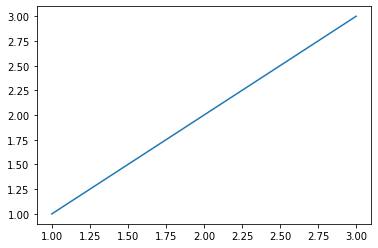

In [225]:
plot_objects = plt.subplots()

fig, ax = plot_objects

ax.plot([1,2,3], [1,2,3])

plot_objects

(<Figure size 1008x432 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60a8972d10>,
       dtype=object))

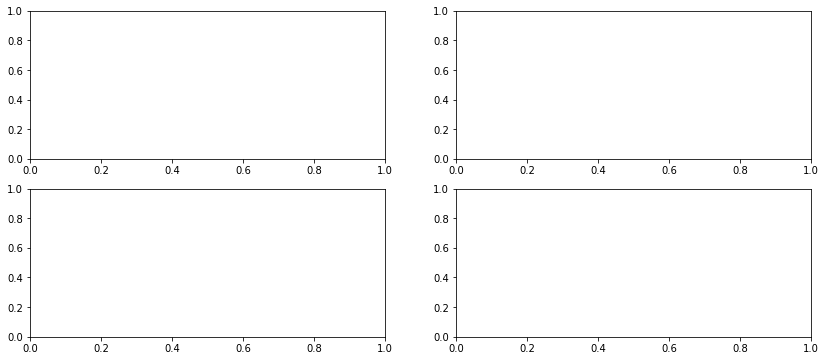

In [226]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))

fig, ((ax1, ax2), (ax3, ax4)) = plot_objects

plot_objects

In [229]:
ax4.plot(np.random.randn(50), c='yellow')
ax1.plot(np.random.randn(50), c='red', linestyle='--')
ax2.plot(np.random.randn(50), c='green', linestyle=':')
ax3.plot(np.random.randn(50), c='blue', marker='o', linewidth=3.0)

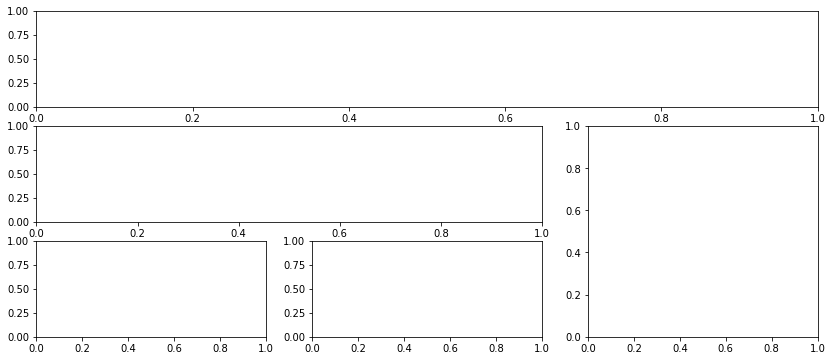

In [228]:
plt.figure(figsize=(14, 6))

ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))

### Scatter Plot

In [230]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N))**2  # 0 to 15 point radii

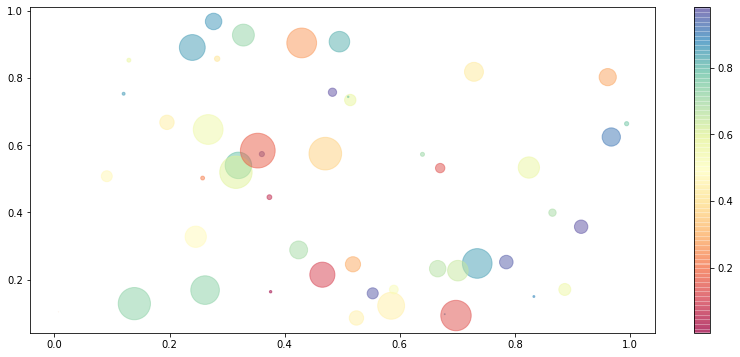

In [231]:
plt.figure(figsize=(14, 6))

plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()

plt.show()

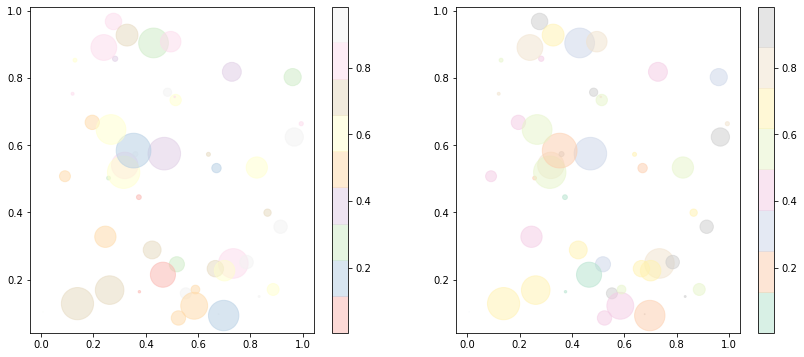

In [232]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1,2,1)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel1')
plt.colorbar()

ax2 = fig.add_subplot(1,2,2)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel2')
plt.colorbar()

plt.show()

### Histograms

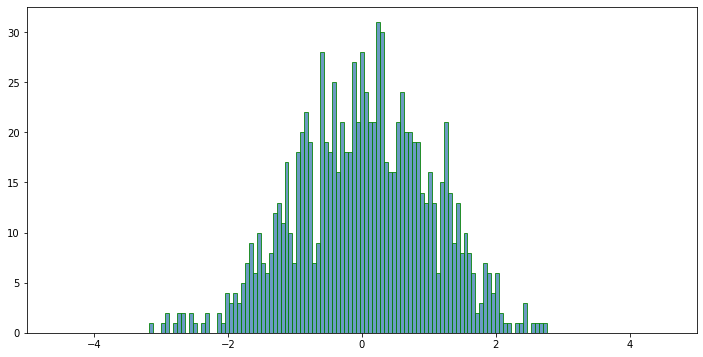

In [233]:
values = np.random.randn(1000)
plt.subplots(figsize=(12, 6))

plt.hist(values, bins=100, alpha=0.8,
          histtype='bar', color='steelblue',
          edgecolor='green')
plt.xlim(xmin=-5, xmax=5)

plt.show()

In [234]:
fig.savefig('hist.png')

### KDE (kernel density estimation)

In [235]:
from scipy import stats

density = stats.kde.gaussian_kde(values)
density

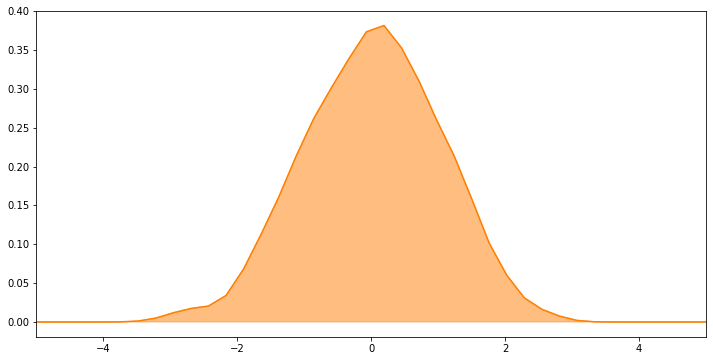

In [236]:
plt.subplots(figsize=(12, 6))

values2 = np.linspace(min(values)-10, max(values)+10, 100)

plt.plot(values2, density(values2), color='#FF7F00')
plt.fill_between(values2, 0, density(values2), alpha=0.5, color='#FF7F00')
plt.xlim(xmin=-5, xmax=5)

plt.show()

### Boxplots and outlier detection

In [237]:
values = np.concatenate([np.random.randn(10), np.array([10, 15, -10, -15])])

(array([1., 1., 0., 0., 4., 6., 0., 0., 1., 1.]),
 array([-15., -12.,  -9.,  -6.,  -3.,   0.,   3.,   6.,   9.,  12.,  15.]),
 <a list of 10 Patch objects>)

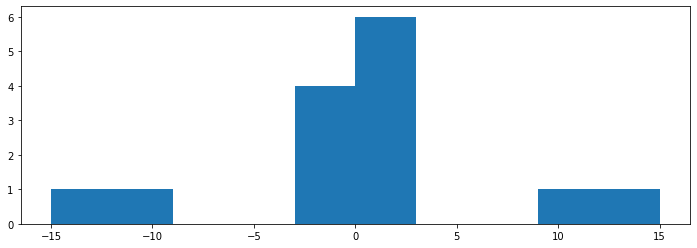

In [238]:
plt.figure(figsize=(12, 4))

plt.hist(values)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f609c81c6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f609c822190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f609c81c110>],
 'medians': [<matplotlib.lines.Line2D at 0x7f609c822c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f609c82a1d0>],
 'means': []}

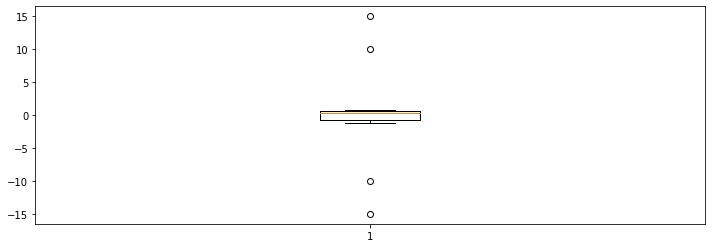

In [239]:
plt.figure(figsize=(12, 4))

plt.boxplot(values)